Anladım 👍 Sen aslında Kaggle sayfasındaki **About Dataset** bölümündeki açıklamayı JupyterLab için uygun bir **Markdown data card** formatında istiyorsun. Ayrıca ANN (Artificial Neural Network) ile deneyeceğini söyledin. Sana uygun şekilde Markdown çıktısını hazırladım:

---

# 🏟️ University Football Injury Prediction Dataset

**Kaynak:** Kaggle — *University Football Injury Prediction Dataset*
**Amaç:** Üniversite futbolcularının bir sonraki akademik sezonda sakatlanıp sakatlanmayacağını tahmin etmek için makine öğrenmesi modelleri geliştirmek.

---

## 🎯 Overview

* **Örnekler:** 800 Çinli üniversite futbolcusu
* **Özellikler:** 18 girdi + 1 hedef etiket
* **Görev:** İkili sınıflandırma (0 = Sakatlık Yok, 1 = Sakatlık Var)
* **Denge:** İyi dengelenmiş veri seti
* **Yaş Aralığı:** 18–24 yıl (üniversite öğrencileri)

---

## 📊 Feature Categories

### ⚙️ Physical Characteristics (4 özellik)

* Age, Height, Weight, BMI
* Standart sağlık muayeneleri ile ölçülmüş

### ⚽ Football-Specific Metrics (4 özellik)

* Playing position, training hours/week, matches played, injury history
* Resmî kayıtlar ve koç değerlendirmeleri

### 🏋️ Physical Fitness Assessment (6 özellik)

* Knee strength, hamstring flexibility, reaction time, balance, sprint speed, agility
* Profesyonel testlerle elde edilmiş

### 🛌 Lifestyle Factors (3 özellik)

* Sleep hours, stress level, nutrition quality
* Anket ve valide edilmiş ölçekler

### 🔥 Training Compliance (1 özellik)

* Warm-up routine adherence (0 = Poor, 1 = Good)

---

## 🎯 Target Variable

**Injury\_Next\_Season**

* İkili sınıflandırma
* Sakatlık tanımı: ≥7 gün spordan uzak kalmaya neden olan antrenman/müsabaka kaynaklı durum
* Üniversite sağlık merkezi + koç raporları ile doğrulanmış

---

## 🔬 Data Quality

* **Toplama Dönemi:** Her akademik yılın ilk 4 haftasında
* **Doğrulama:** Medikal kayıtlar, koç raporları, öğrenci anketleri
* **Kontrol:** Spor hekimliği uzmanlarınca gözden geçirilmiş
* **Eksik Veri:** Minimal

---

## 🚀 Potential Applications

* Spor hekimliği araştırmaları
* Önleyici sağlık stratejileri
* Üniversite sporcu yönetimi
* ML algoritma validasyonu

---

## 📈 Suggested Approaches

* **ML Modelleri:** Logistic Regression, Random Forest, SVM, XGBoost
* **Değerlendirme Metrikleri:** Accuracy, Precision, Recall, F1-Score, AUC-ROC
* **Doğrulama:** Stratified cross-validation

---

## 🏆 Research Value

Bu veri seti spor bilimi ile makine öğrenmesini birleştirerek sakatlık tahminine yönelik değerli bir araştırma ortamı sunar. Özellikle spor hekimliği, önleyici sağlık ve uygulamalı ML alanlarında önemlidir.

---

## ⚡ ANN (Artificial Neural Network) ile Deneme İçin Öneri

JupyterLab’de ANN için tipik başlangıç pipeline’ı:

```python
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Veri yükleme
df = pd.read_csv("football_injury.csv")

X = df.drop(columns=["Injury_Next_Season"])
y = df["Injury_Next_Season"]

# Normalizasyon
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=42
)

# Torch tensörleri
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train.values, dtype=torch.float32).unsqueeze(1)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test.values, dtype=torch.float32).unsqueeze(1)

# Basit ANN
class ANN(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Linear(input_dim, 32),
            nn.ReLU(),
            nn.Linear(32, 16),
            nn.ReLU(),
            nn.Linear(16, 1),
            nn.Sigmoid()
        )
    def forward(self, x):
        return self.layers(x)

model = ANN(X_train.shape[1])
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Eğitim
for epoch in range(100):
    optimizer.zero_grad()
    y_pred = model(X_train)
    loss = criterion(y_pred, y_train)
    loss.backward()
    optimizer.step()
    if (epoch+1) % 10 == 0:
        print(f"Epoch {epoch+1}, Loss: {loss.item():.4f}")
```

---

İstersen sana **ANN eğitim raporunu (loss, accuracy, AUC)** otomatik çıkaracak ek kod bloğu da hazırlayabilirim. İstiyor musun?


In [41]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
tf.__version__

'2.11.1'

In [42]:
dataset = pd.read_csv("football_injury.csv")

In [43]:
print("Şekil:", dataset.shape)
print("İlk sütunlar:", list(dataset.columns)[:])

Şekil: (800, 19)
İlk sütunlar: ['Age', 'Height_cm', 'Weight_kg', 'Position', 'Training_Hours_Per_Week', 'Matches_Played_Past_Season', 'Previous_Injury_Count', 'Knee_Strength_Score', 'Hamstring_Flexibility', 'Reaction_Time_ms', 'Balance_Test_Score', 'Sprint_Speed_10m_s', 'Agility_Score', 'Sleep_Hours_Per_Night', 'Stress_Level_Score', 'Nutrition_Quality_Score', 'Warmup_Routine_Adherence', 'Injury_Next_Season', 'BMI']


In [44]:
assert "Injury_Next_Season" in dataset.columns, "Sakatlık sütunu bulunamadı"
y = dataset["Injury_Next_Season"].values
print(y)

[0 0 1 0 1 0 1 0 0 0 1 1 0 1 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 0 1 1 0 1 1 1 0
 1 0 0 1 1 1 1 0 0 0 0 0 0 1 1 0 1 1 1 0 1 1 1 0 0 0 1 1 0 1 0 1 1 0 1 0 1
 1 1 1 0 0 0 0 1 1 1 0 0 0 1 1 1 0 0 1 1 0 0 0 0 1 0 1 0 1 1 1 1 1 0 1 1 0
 0 1 1 0 1 0 0 1 1 1 1 1 0 1 1 0 1 1 0 0 1 1 0 1 0 0 1 0 0 1 0 0 1 1 0 1 1
 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 0 0 0 0 0 1 0 0
 1 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 1 1 0 1 1 1 0 1 0 0 1 1 1 1 1 0 1 1 0 0 1
 0 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1 1 0 0 0 0 1 0 1 1 1 1 0 0 1 1 0 1 1 0 1
 1 1 1 0 0 0 1 1 1 0 0 1 1 0 1 0 1 0 0 1 0 0 1 1 0 0 1 0 1 1 1 0 0 1 0 0 1
 1 1 1 0 1 0 0 0 0 0 0 1 0 1 1 1 0 0 0 1 0 0 1 0 0 1 0 0 1 1 1 1 0 0 1 0 0
 0 0 1 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 1 0 1 1 0 1 1 1 0 0 1 1 0 1 1 1 1 0 1
 1 0 1 1 1 0 0 0 0 1 0 1 1 0 0 0 1 1 0 1 0 0 0 0 1 1 0 1 1 0 1 1 1 0 1 1 0
 0 1 1 0 0 1 0 0 0 0 1 1 0 0 0 1 1 0 0 1 0 1 0 0 0 1 1 0 1 1 1 1 1 1 1 1 0
 1 1 0 1 0 0 1 1 1 0 1 1 1 1 1 0 0 0 1 0 1 1 0 0 1 0 1 1 0 1 1 0 1 0 1 1 1
 1 1 1 0 0 0 0 0 1 1 0 0 

In [45]:
X = dataset.drop(columns=["Injury_Next_Season"])
print(X)

     Age  Height_cm  Weight_kg    Position  Training_Hours_Per_Week  \
0     22        173         64  Midfielder                11.575308   
1     18        170         67  Midfielder                12.275869   
2     22        186         75     Forward                12.254896   
3     20        172         62    Defender                 9.006678   
4     18        172         94  Midfielder                12.683668   
..   ...        ...        ...         ...                      ...   
795   22        182         63  Goalkeeper                10.624037   
796   21        181         66    Defender                 9.732842   
797   24        182         75  Goalkeeper                 5.494318   
798   20        188         86  Goalkeeper                10.303923   
799   22        186         73  Midfielder                 9.815368   

     Matches_Played_Past_Season  Previous_Injury_Count  Knee_Strength_Score  \
0                            36                      1            77

In [46]:
num_candidates = [
    "Age",
    "Height_cm",
    "Weight_kg",
    "Training_Hours_Per_Week",
    "Matches_Played_Past_Seaso",
    "Previous_Injury_Count",
    "Knee_Strength_Score",
    "Hamstring_Flexibility",
    "Reaction_Time_ms",
    "Balance_Test_Score",
    "Sprint_Speed_10m_s",
    "Agility_Score",
    "Sleep_Hours_Per_Night",
    "Stress_Level_Score",
    "Nutrition_Quality_Score",
    "Warmup_Routine_Adherence",
    "BMI",
    "Matches_Played_Past_Season"
]

numeric_cols = [c for c in num_candidates if c in X.columns]
categorical_cols = [c for c in X.columns if c not in numeric_cols]

print(f"Sayısal {len(numeric_cols)} -> {numeric_cols}")
print(f"Kategorik {len(categorical_cols)} -> {categorical_cols[:]}")

Sayısal 17 -> ['Age', 'Height_cm', 'Weight_kg', 'Training_Hours_Per_Week', 'Previous_Injury_Count', 'Knee_Strength_Score', 'Hamstring_Flexibility', 'Reaction_Time_ms', 'Balance_Test_Score', 'Sprint_Speed_10m_s', 'Agility_Score', 'Sleep_Hours_Per_Night', 'Stress_Level_Score', 'Nutrition_Quality_Score', 'Warmup_Routine_Adherence', 'BMI', 'Matches_Played_Past_Season']
Kategorik 1 -> ['Position']


In [47]:
#Dönüşümler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer


try:
    cat_ohe = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
except TypeError:
    cat_ohe = OneHotEncoder(handle_unknown="ignore", sparse=False)

    
numeric_tf = Pipeline(
    steps = [
        ("imputer", SimpleImputer(strategy="median")), #ortalamasına göre eksiklere ekleniyor
        ("scaler", StandardScaler()) #verileri standartlaştırıyoruz
    ]
)

categorical_tf = Pipeline(
    steps = [
        ("imputer", SimpleImputer(strategy="most_frequent")),  # kategorik eksikler
        ("ohe", cat_ohe)
    ]
)


preprocess = ColumnTransformer(
    transformers = [
        ("num", numeric_tf, numeric_cols),
        ("cat",categorical_tf,categorical_cols)
    ]
)

In [48]:
from sklearn.model_selection import train_test_split
# 4) Train/Valid/Test
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.30, stratify=y, random_state=42
)
X_valid, X_test, y_valid, y_test = train_test_split(
    X_temp, y_temp, test_size=0.50, stratify=y_temp, random_state=42
)
print("Split:", X_train.shape, X_valid.shape, X_test.shape)

Split: (560, 18) (120, 18) (120, 18)


In [49]:
X_train_p = preprocess.fit_transform(X_train)
X_valid_p = preprocess.transform(X_valid)
X_test_p  = preprocess.transform(X_test)

feature_dim = X_train_p.shape[1]
print("Feature dim:", feature_dim)

Feature dim: 21


In [50]:
X_train_p

array([[-1.56026281, -0.46391589, -0.45893068, ...,  0.        ,
         0.        ,  1.        ],
       [-0.57797257,  1.35379546, -0.866384  , ...,  0.        ,
         0.        ,  0.        ],
       [-0.08682744,  0.23520386,  0.25411263, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [-0.57797257,  0.51485176,  0.45783929, ...,  0.        ,
         1.        ,  0.        ],
       [-1.06911769,  0.79449966, -1.07011066, ...,  0.        ,
         0.        ,  1.        ],
       [-0.08682744,  1.49361941,  0.55970262, ...,  0.        ,
         0.        ,  1.        ]])

In [51]:
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import (roc_auc_score, roc_curve, average_precision_score,
                             precision_recall_curve, classification_report,
                             confusion_matrix, accuracy_score, precision_score,
                             recall_score, f1_score)

In [52]:
classes = np.unique(y_train)
cw = compute_class_weight(class_weight="balanced", classes=classes, y=y_train)
class_weight = {int(c): w for c, w in zip(classes, cw)}
print("class_weight:", class_weight)

class_weight: {0: 1.0, 1: 1.0}


In [53]:
def build_model(input_dim, dropout=0.3, lr=1e-3):
    model = keras.Sequential([
        layers.Input(shape=(input_dim,)),
        layers.Dense(64, activation="relu"),
        layers.Dropout(dropout),
        layers.Dense(32, activation="relu"),
        layers.Dropout(dropout/2),
        layers.Dense(1, activation="sigmoid")
    ])
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=lr),
        loss="binary_crossentropy",
        metrics=["accuracy", keras.metrics.AUC(name="auc"),
                 keras.metrics.Precision(name="precision"),
                 keras.metrics.Recall(name="recall")]
    )
    return model

model = build_model(feature_dim, dropout=0.3, lr=1e-3)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1408      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3,521
Trainable params: 3,521
Non-trainable params: 0
_________________________________________________________________


In [54]:
early = keras.callbacks.EarlyStopping(
    monitor="val_auc", mode="max", patience=10, restore_best_weights=True, verbose=1
)
plateau = keras.callbacks.ReduceLROnPlateau(
    monitor="val_loss", factor=0.5, patience=5, min_lr=1e-6, verbose=1
)

In [55]:
# 9) Eğitim
history = model.fit(
    X_train_p, y_train,
    validation_data=(X_valid_p, y_valid),
    epochs=100,
    batch_size=32,
    class_weight=class_weight,
    callbacks=[early, plateau],
    verbose=1
)

Epoch 1/100
18/18 [==============================] - 2s 30ms/step - loss: 0.6112 - accuracy: 0.6500 - auc: 0.7519 - precision: 0.6135 - recall: 0.8107 - val_loss: 0.5565 - val_accuracy: 0.7667 - val_auc: 0.8514 - val_precision: 0.7286 - val_recall: 0.8500 - lr: 0.0010
Epoch 2/100
18/18 [==============================] - 0s 6ms/step - loss: 0.4568 - accuracy: 0.8446 - auc: 0.9252 - precision: 0.8362 - recall: 0.8571 - val_loss: 0.4288 - val_accuracy: 0.8500 - val_auc: 0.9258 - val_precision: 0.8500 - val_recall: 0.8500 - lr: 0.0010
Epoch 3/100
18/18 [==============================] - 0s 6ms/step - loss: 0.3377 - accuracy: 0.9018 - auc: 0.9625 - precision: 0.9061 - recall: 0.8964 - val_loss: 0.3317 - val_accuracy: 0.8667 - val_auc: 0.9539 - val_precision: 0.8793 - val_recall: 0.8500 - lr: 0.0010
Epoch 4/100
18/18 [==============================] - 0s 6ms/step - loss: 0.2543 - accuracy: 0.9179 - auc: 0.9782 - precision: 0.9270 - recall: 0.9071 - val_loss: 0.2679 - val_accuracy: 0.8833 - v

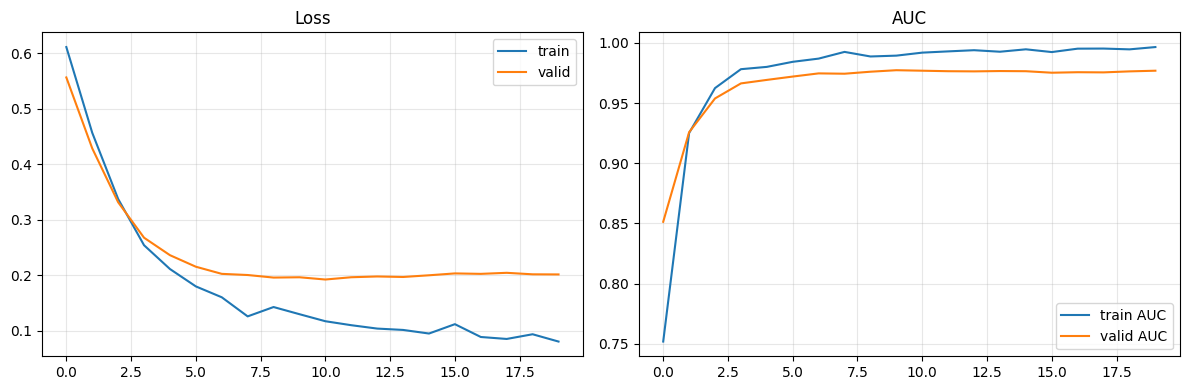

In [57]:
import matplotlib.pyplot as plt
from pathlib import Path
hist = pd.DataFrame(history.history)
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(hist["loss"], label="train"); plt.plot(hist["val_loss"], label="valid")
plt.title("Loss"); plt.legend(); plt.grid(alpha=0.3)
plt.subplot(1,2,2)
plt.plot(hist["auc"], label="train AUC"); plt.plot(hist["val_auc"], label="valid AUC")
plt.title("AUC"); plt.legend(); plt.grid(alpha=0.3)
plt.tight_layout(); plt.show()

In [58]:
# 11) Test set değerlendirme (varsayılan eşik 0.5)
y_proba = model.predict(X_test_p).ravel()
y_pred = (y_proba >= 0.5).astype(int)

auc  = roc_auc_score(y_test, y_proba)
acc  = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, zero_division=0)
rec  = recall_score(y_test, y_pred, zero_division=0)
f1   = f1_score(y_test, y_pred, zero_division=0)

print(f"\nTest AUC : {auc:.3f}")
print(f"Accuracy : {acc:.3f}")
print(f"Precision: {prec:.3f}")
print(f"Recall   : {rec:.3f}")
print(f"F1       : {f1:.3f}")

print("\nReport (0=good, 1=bad):\n", classification_report(y_test, y_pred, digits=3))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

4/4 [==============================] - 0s 3ms/step

Test AUC : 0.997
Accuracy : 0.958
Precision: 0.951
Recall   : 0.967
F1       : 0.959

Report (0=good, 1=bad):
               precision    recall  f1-score   support

           0      0.966     0.950     0.958        60
           1      0.951     0.967     0.959        60

    accuracy                          0.958       120
   macro avg      0.958     0.958     0.958       120
weighted avg      0.958     0.958     0.958       120

Confusion Matrix:
 [[57  3]
 [ 2 58]]


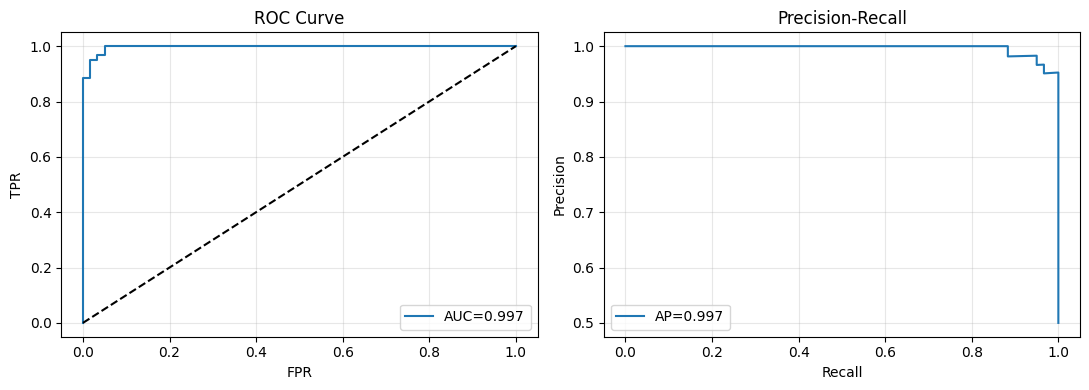

In [59]:
# 12) ROC ve PR eğrileri
fpr, tpr, _ = roc_curve(y_test, y_proba)
ap = average_precision_score(y_test, y_proba)

plt.figure(figsize=(11,4))
plt.subplot(1,2,1)
plt.plot(fpr, tpr, label=f"AUC={auc:.3f}")
plt.plot([0,1],[0,1],'k--')
plt.xlabel("FPR"); plt.ylabel("TPR")
plt.title("ROC Curve"); plt.legend(); plt.grid(alpha=0.3)

prec_curve, rec_curve, thr = precision_recall_curve(y_test, y_proba)
plt.subplot(1,2,2)
plt.plot(rec_curve, prec_curve, label=f"AP={ap:.3f}")
plt.xlabel("Recall"); plt.ylabel("Precision")
plt.title("Precision-Recall"); plt.legend(); plt.grid(alpha=0.3)
plt.tight_layout(); plt.show()


In [60]:
# 13) Eşik (threshold) optimizasyonu: F1 maksimize
def best_threshold(y_true, y_prob, metric="f1"):
    ts = np.linspace(0.1, 0.9, 17)
    best_t, best_s = 0.5, -1
    for t in ts:
        yp = (y_prob >= t).astype(int)
        if metric == "f1":
            s = f1_score(y_true, yp, zero_division=0)
        else:
            s = 0
        if s > best_s:
            best_s, best_t = s, t
    return best_t, best_s

t_star, s_star = best_threshold(y_test, y_proba, metric="f1")
print(f"\nEn iyi eşik (F1): {t_star:.2f} (skor={s_star:.3f})")

y_star = (y_proba >= t_star).astype(int)
print("Report@best:\n", classification_report(y_test, y_star, digits=3))
print("CM@best:\n", confusion_matrix(y_test, y_star))


En iyi eşik (F1): 0.30 (skor=0.976)
Report@best:
               precision    recall  f1-score   support

           0      1.000     0.950     0.974        60
           1      0.952     1.000     0.976        60

    accuracy                          0.975       120
   macro avg      0.976     0.975     0.975       120
weighted avg      0.976     0.975     0.975       120

CM@best:
 [[57  3]
 [ 0 60]]


In [79]:
sample_df = pd.read_csv("test.csv")
X_new = sample_df.drop(columns=["Injury_Next_Season"])
X_new_p = preprocess.transform(X_new)
X_new_p


array([[ 5.31576892, -0.60373984, -0.96824733,  4.85063558, 14.48080296,
         0.36713879, -4.38991422, -2.91168931, -1.79915539, 14.87341066,
        -1.37083191, -1.50803976, -1.15061431, -3.54088289,  0.81649658,
         1.07424181,  2.33621621,  0.        ,  1.        ,  0.        ,
         0.        ],
       [ 3.35118842, -1.02321169, -0.66265734,  0.11808911,  6.6533419 ,
        -0.34534317, -3.88759951, 13.47223966, -3.79910189, 29.73001642,
        -0.4810622 ,  0.74347962, -1.25972183, -1.42777197,  0.81649658,
        -2.28695885, -1.61542105,  0.        ,  0.        ,  0.        ,
         1.        ],
       [ 2.8600433 ,  1.21397151,  0.1522493 , -0.65953601,  2.73961137,
         0.30870485, -0.4563933 , 14.3020024 , -8.66352437,  5.38458705,
        -2.10143507,  8.79974651, -2.67867098,  0.06345245, -1.22474487,
        -1.87497807,  2.14345341,  0.        ,  1.        ,  0.        ,
         0.        ],
       [-0.57797257, -0.74356379, -1.17197399, -1.13982217

In [85]:
y_new_proba = model.predict(X_new_p).ravel()
y_new_pred = (y_new_proba >= 0.5).astype(int)

print("olasılıklar:", y_new_proba.round(3))
print("tahminler:", y_new_pred.tolist())

1/1 [==============================] - 0s 31ms/step
olasılıklar: [0.62  0.    0.989 1.   ]
tahminler: [1, 0, 1, 1]
